In [1]:
import sys
sys.path.append("../")

import pyfesom as pf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
#%matplotlib notebook
%matplotlib inline
from matplotlib import cm
from netCDF4 import Dataset, MFDataset

First, as usuall load the mesh:

In [3]:
meshpath  ='/csys/nobackup1_CLIDYN/nkolduno/pyfesom/DATA/mesh/COREII'
mesh = pf.load_mesh(meshpath, get3d=True, usepickle=True)

The *usepickle = True* and the pickle file (*pickle_mesh*) exists.
 We load the mesh from it.


Let's have a look at the files that we have in the data directory:

In [4]:
ls /csys/nobackup1_CLIDYN/nkolduno/pyfesom/DATA/results/COREII/fesom.????.oce.mean.nc

/csys/nobackup1_CLIDYN/nkolduno/pyfesom/DATA/results/COREII/fesom.2006.oce.mean.nc
/csys/nobackup1_CLIDYN/nkolduno/pyfesom/DATA/results/COREII/fesom.2007.oce.mean.nc


We have two separate netCDF4 files, but we can load them at once with *MFDataset*

In [6]:
fl = MFDataset('/csys/nobackup1_CLIDYN/nkolduno/pyfesom/DATA/results/COREII/fesom.????.oce.mean.nc')

In [7]:
fl.variables['temp'].shape

(24, 3668773)

Make a mean over all timesteps:

In [8]:
%%time
temp_mean = fl.variables['temp'][:,:].mean(axis=0)

CPU times: user 372 ms, sys: 664 ms, total: 1.04 s
Wall time: 1.04 s


And plot the data

In [9]:
map = Basemap(projection='robin',lon_0=0, resolution='c')
x, y = map(mesh.x2, mesh.y2)

For depth 100 model level 100.0 will be used
CPU times: user 704 ms, sys: 212 ms, total: 916 ms
Wall time: 662 ms


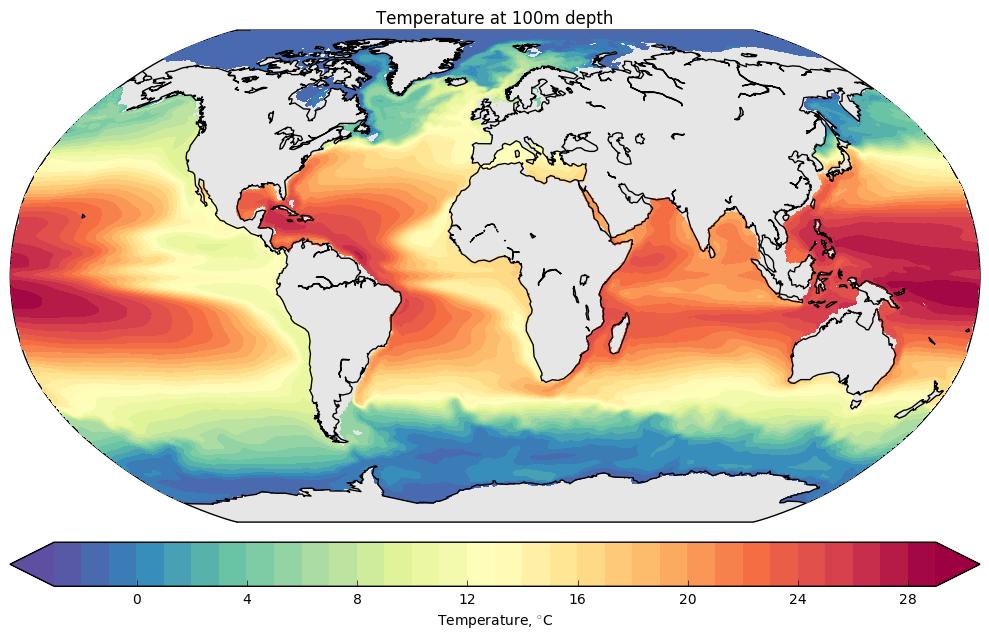

In [10]:
%%time
level_data, elem_no_nan = pf.get_data(temp_mean,mesh,100)

plt.figure(figsize=(10,7))
map.drawmapboundary(fill_color='0.9')
map.drawcoastlines()

levels = np.arange(-3., 30., 1)
plt.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, \
                cmap=cm.Spectral_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Temperature, $^{\circ}$C")
plt.title('Temperature at 100m depth')
plt.tight_layout()

Do STD instead of mean

In [11]:
%%time
temp_std = fl.variables['temp'][:,:].std(axis=0)

CPU times: user 496 ms, sys: 732 ms, total: 1.23 s
Wall time: 1.24 s


For depth 100 model level 100.0 will be used


/scratch/users/nkolduno/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less_equal
/scratch/users/nkolduno/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in greater_equal


CPU times: user 464 ms, sys: 176 ms, total: 640 ms
Wall time: 446 ms


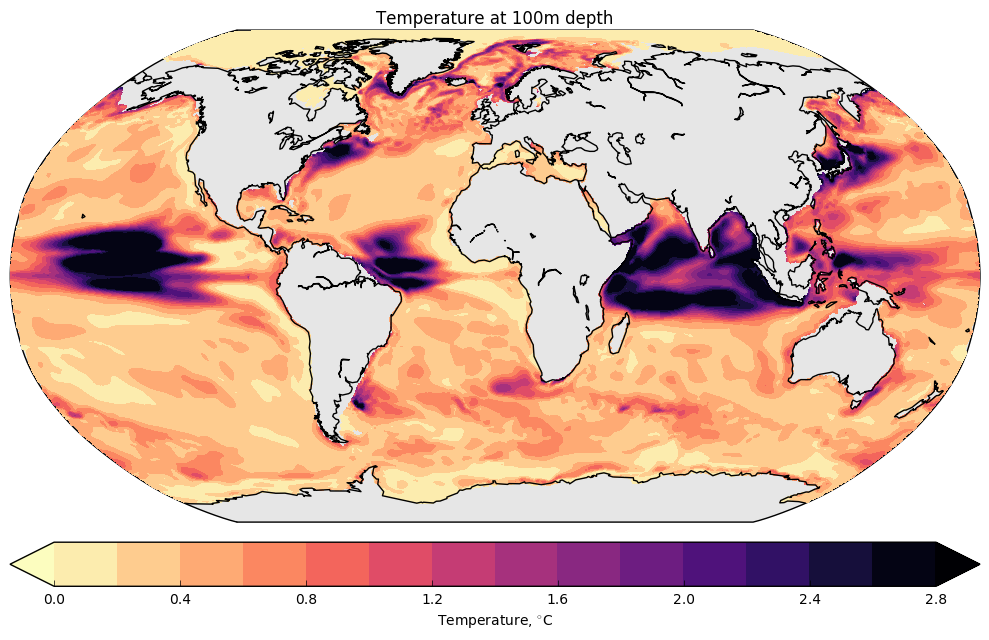

In [12]:
%%time
level_data, elem_no_nan = pf.get_data(temp_std,mesh,100)

plt.figure(figsize=(10,7))
map.drawmapboundary(fill_color='0.9')
map.drawcoastlines()

levels = np.arange(0, 3., 0.2)
eps=(levels.max()-levels.min())/50.
level_data[level_data<=levels.min()]=levels.min()+eps
level_data[level_data>=levels.max()]=levels.max()-eps
plt.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, \
                cmap=cm.magma_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Temperature, $^{\circ}$C")
plt.title('Temperature at 100m depth')
plt.tight_layout()

Or make an interactive plotting interface:

In [13]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [14]:
def sp(mon=0, depth = 100):
    level_data, elem_no_nan = pf.get_data(fl.variables['temp'][mon-1,:]-temp_mean,\
                                          mesh, depth)

    plt.figure(figsize=(10,7))
    map.drawmapboundary(fill_color='0.9')
    map.drawcoastlines()

    levels = np.arange(-2, 2., 0.2)
    eps=(levels.max()-levels.min())/50.
    level_data[level_data<=levels.min()]=levels.min()+eps
    level_data[level_data>=levels.max()]=levels.max()-eps
    plt.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, \
                    cmap=cm.coolwarm, extend='both')
    cbar = plt.colorbar(orientation='horizontal', pad=0.03);
    cbar.set_label("Temperature, $^{\circ}$C")
    plt.title('Temperature at {}m depth, month {}'.format(str(depth),str(mon)))
    plt.tight_layout()

For depth 0 model level -0.0 will be used


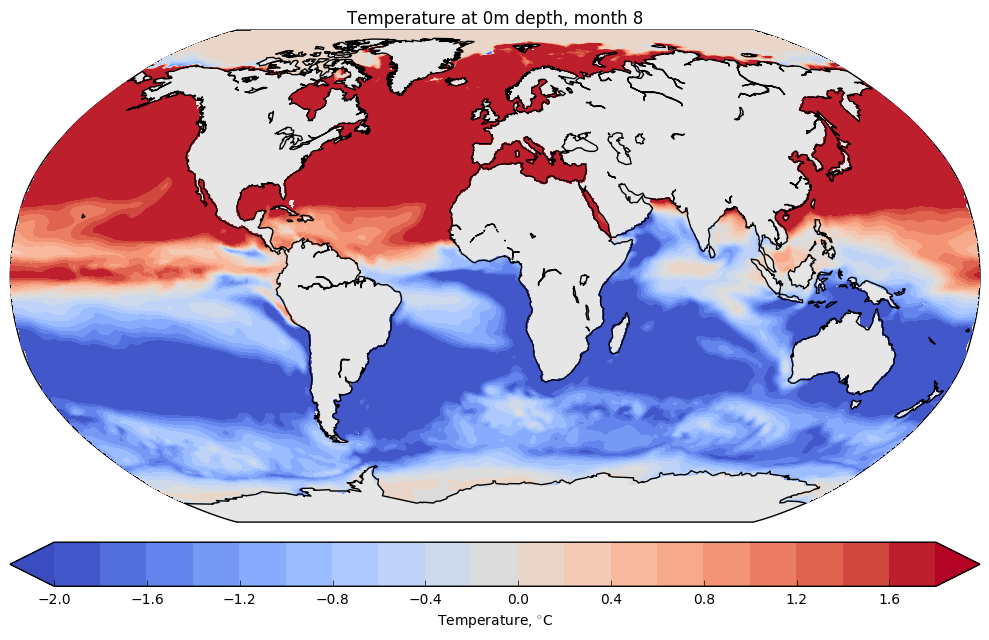

In [15]:
interact(sp, mon =(1,24), depth = (0,5000,100));